<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Support Vector Regression

---

Instead of minimizing the mean squared error, we do the following:

- We tolerate errors smaller than a constant $\epsilon$.
- Errors larger than $\epsilon$ contribute linearly to the loss function.
- We allow again a certain slack which allows points to be on the wrong side of the fitted curve.
- The optimisation problem can then be formulated in a very similar way as for classification.

Find 

$${\rm min } \frac{1}{2}\|w\|^2 + C \sum_{i=1}^n (\xi_+^i+\xi_-^i)$$

with 

$$
\begin{eqnarray*}
y^i-(w^T x^i+w_0)&\le& \epsilon + \xi_+^i\\
y^i-(w^T x^i+w_0)&\ge& \epsilon + \xi_{-}^i
\end{eqnarray*}
$$

# Example from [sklearn](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import linear_model, metrics
from pathlib import Path
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(8))

In [3]:
svr_lin = svm.LinearSVR(C=1e3)
svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.3, epsilon=0.3)
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2, epsilon=0.3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

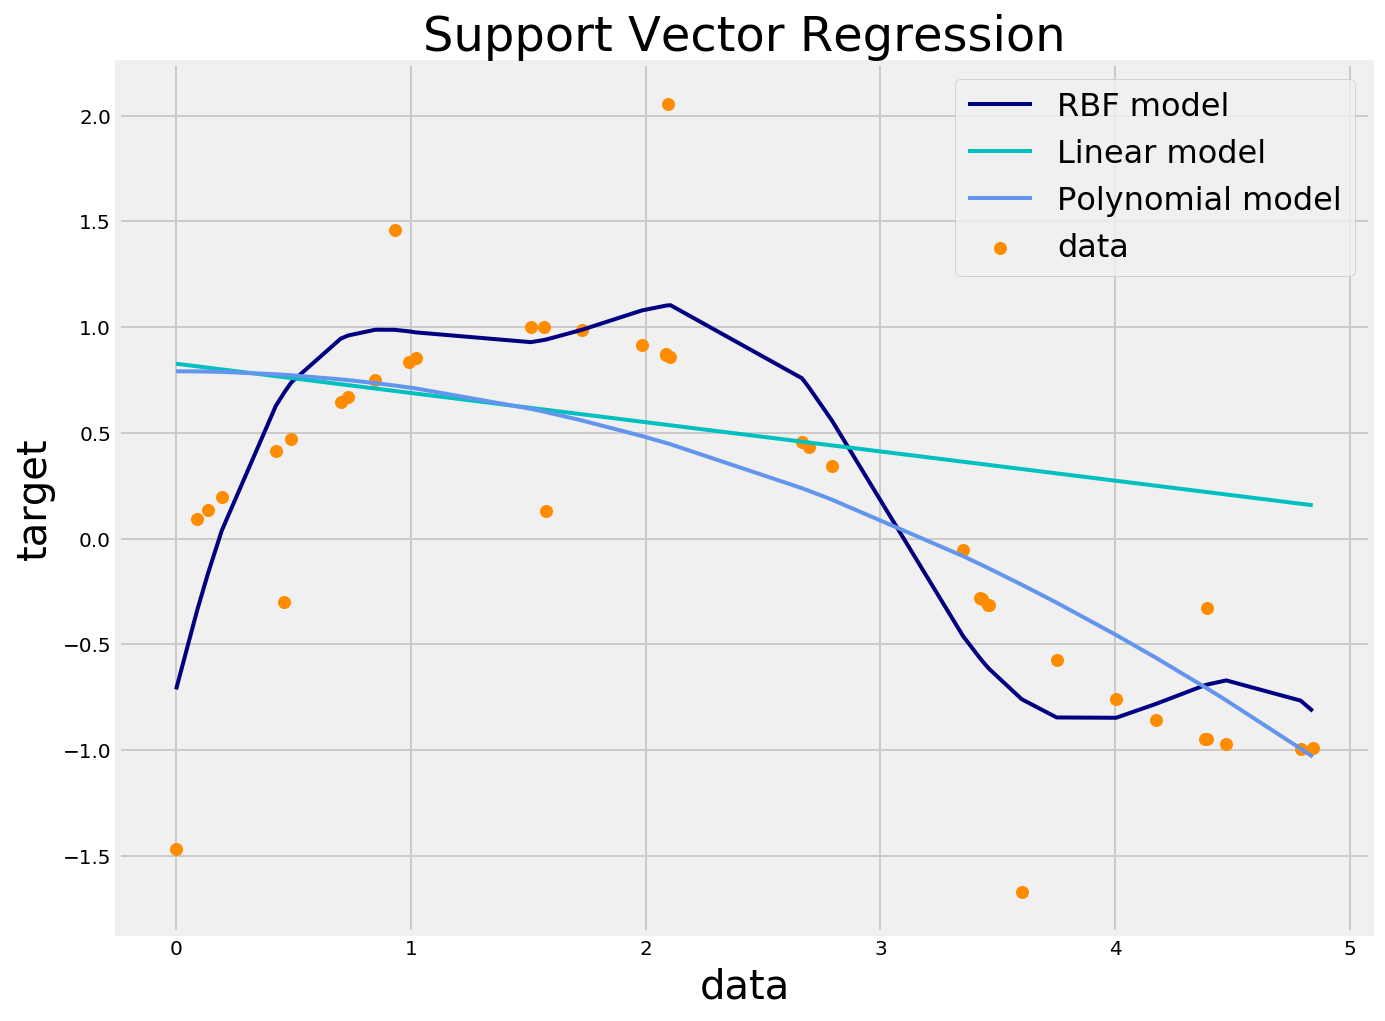

In [4]:
plt.figure(figsize=(10,8))
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('Support Vector Regression',fontsize=24)
plt.legend(fontsize=16)
plt.show()

In [5]:
# coefficients for the linear SVM
print(svr_lin.intercept_, svr_lin.coef_)

[0.82663266] [-0.13827342]


In [6]:
len(X), len(svr_rbf.support_vectors_)

(40, 14)

In [7]:
def plot_svr(model,X,y,y_pred):
    plt.figure(figsize=(8,6))
    lw = 2
    support_vectors = model.support_
    epsilon = model.epsilon
    plt.scatter(X[~support_vectors], y[~support_vectors], color='darkorange', label='data')
    plt.scatter(X[support_vectors], y[support_vectors], marker='x', color='darkorange', label='support vectors')
    plt.plot(X, y_pred, color='navy', lw=lw, label='RBF model')
    plt.plot(X, y_pred+epsilon, color='navy', ls='--', lw=lw/2.)
    plt.plot(X, y_pred-epsilon, color='navy', ls='--', lw=lw/2.)
    plt.xlabel('data',fontsize=20)
    plt.ylabel('target',fontsize=20)
    plt.title('Support Vector Regression',fontsize=24)
    plt.legend(fontsize=16)
    plt.show()

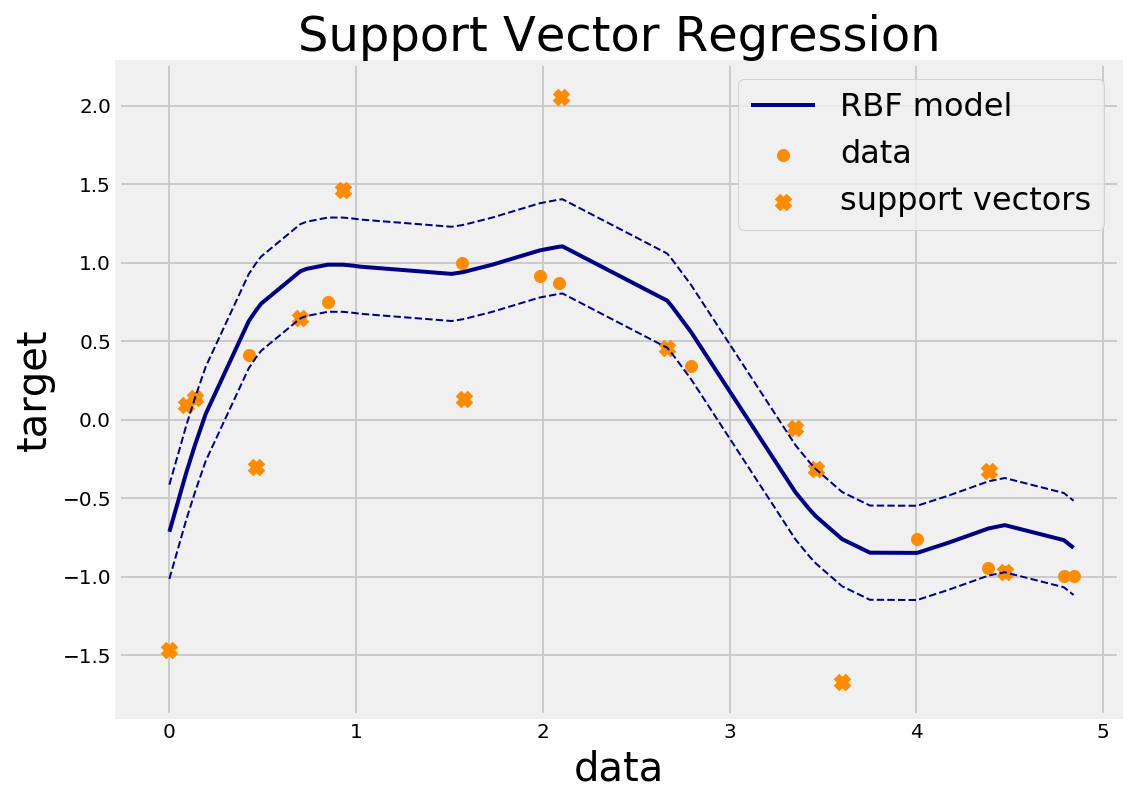

In [8]:
plot_svr(svr_rbf,X,y,y_rbf)

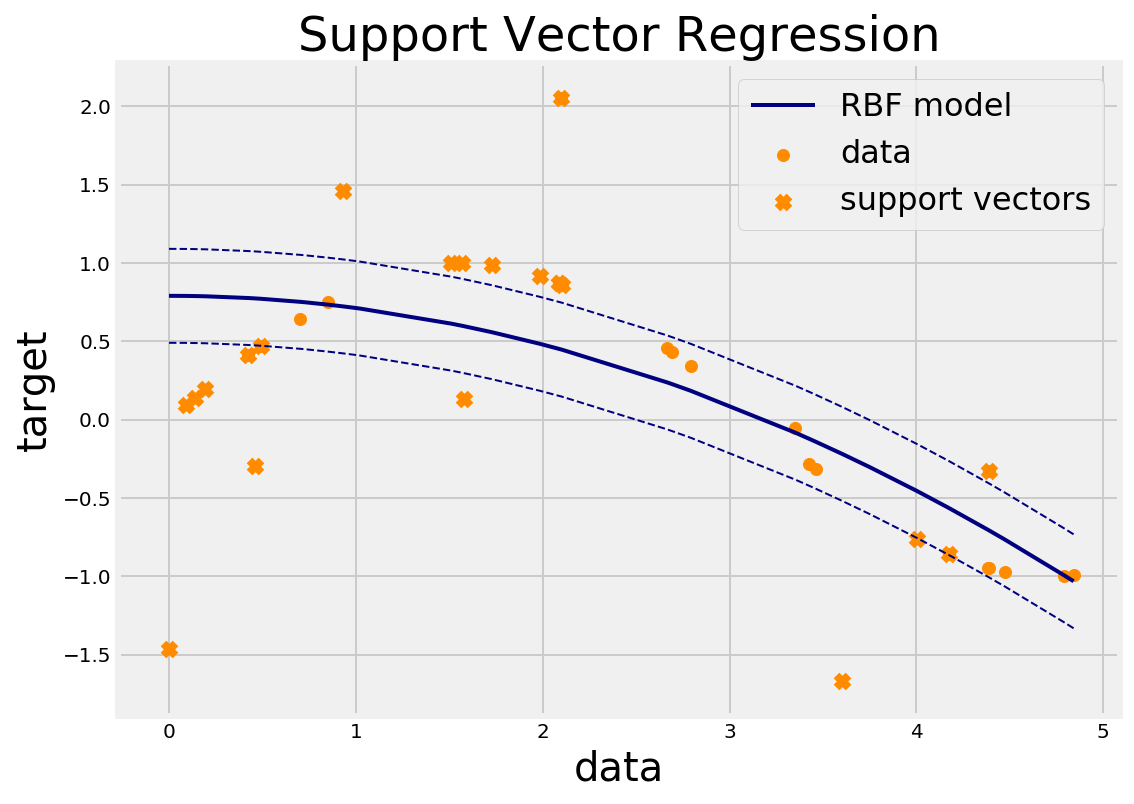

In [9]:
plot_svr(svr_poly,X,y,y_poly)